In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score

In [3]:
%matplotlib inline

In [6]:
heartdata = pd.read_csv('./Datasets/Heart.csv', index_col = 0)

In [8]:
heartdata = heartdata.drop(['ChestPain', 'Thal'], axis = 1)

In [9]:
heartdata.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'AHD'],
      dtype='object')

In [10]:
data = heartdata[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca']]

In [11]:
target = heartdata[['AHD']]

In [20]:
imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

In [21]:
imp.fit(data)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [22]:
data = pd.DataFrame(data = imp.transform(data), columns = data.columns)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [43]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 101)

In [44]:
clf.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [45]:
y_pred=clf.predict(X_test)

In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8571428571428571


In [51]:
chk = np.asarray(data, dtype = np.float64)

In [54]:
chk

array([[ 63.       ,   1.       , 145.       , ...,   2.3      ,
          3.       ,   0.       ],
       [ 67.       ,   1.       , 160.       , ...,   1.5      ,
          2.       ,   3.       ],
       [ 67.       ,   1.       , 120.       , ...,   2.6      ,
          2.       ,   2.       ],
       ...,
       [ 57.       ,   1.       , 130.       , ...,   1.2      ,
          2.       ,   1.       ],
       [ 57.       ,   0.       , 130.       , ...,   0.       ,
          2.       ,   1.       ],
       [ 38.       ,   1.       , 138.       , ...,   0.       ,
          1.       ,   0.6722408]])

In [58]:
feature_imp = pd.Series(clf.feature_importances_,index = data.columns).sort_values(ascending=False)

In [59]:
feature_imp

MaxHR      0.158324
Ca         0.133795
Oldpeak    0.124130
Age        0.116228
Chol       0.114209
RestBP     0.098250
ExAng      0.095728
Slope      0.069751
Sex        0.051791
RestECG    0.023759
Fbs        0.014034
dtype: float64

No handles with labels found to put in legend.


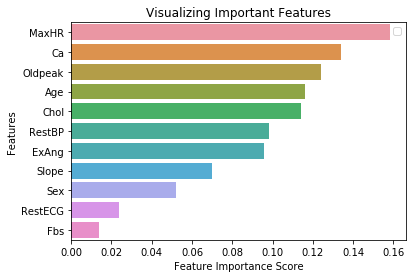

In [60]:
sns.barplot(x = feature_imp, y = feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()

In [61]:
data.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca'],
      dtype='object')

### Removing Fbs and RestECG

In [62]:
dataadj = data[['Age', 'Sex', 'RestBP', 'Chol', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca']]

In [92]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(dataadj, target, test_size=0.2)

In [97]:
clf2 = RandomForestClassifier(n_estimators = 45, random_state = 42)

In [98]:
clf2.fit(X_train2,y_train2)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [99]:
y_pred2 = clf2.predict(X_test2)

In [100]:
print("Accuracy:", accuracy_score(y_test2, y_pred2))

Accuracy: 0.819672131147541
